# Segmentace s využitím barevných světel

## Import knihoven a konfigurace

In [2]:
%run ./library.ipynb

### Pomocné funkce
Z následujících funkcí je potřeba vybírat ty vhodné pro splnění úkolu.

Seznam funkcí pro přehlednost:
- [`plot_images(...)`](https://gitlab.fit.cvut.cz/bi-svz/improutils_package/-/blob/master/improutils/visualisation/visualisation.py#L11)
- [`load_image(...)`](https://gitlab.fit.cvut.cz/bi-svz/improutils_package/-/blob/master/improutils/acquisition/img_io.py#L11)


- [`to_gray(...)`](https://gitlab.fit.cvut.cz/bi-svz/improutils_package/-/blob/master/improutils/preprocessing/preprocessing.py#L4)
- [`to_hsv(...)`](https://gitlab.fit.cvut.cz/bi-svz/improutils_package/-/blob/master/improutils/preprocessing/preprocessing.py#L21)
- [`negative(...)`](https://gitlab.fit.cvut.cz/bi-svz/improutils_package/-/blob/master/improutils/preprocessing/preprocessing.py#L53)
- [`crop(...)`](https://gitlab.fit.cvut.cz/bi-svz/improutils_package/-/blob/master/improutils/preprocessing/preprocessing.py#L99)


- [`segmentation_one_threshold(...)`](https://gitlab.fit.cvut.cz/bi-svz/improutils_package/-/blob/master/improutils/segmentation/segmentation.py#L56)
- [`segmentation_auto_threshold(...)`](https://gitlab.fit.cvut.cz/bi-svz/improutils_package/-/blob/master/improutils/segmentation/segmentation.py#L74)
- [`segmentation_two_thresholds(...)`](https://gitlab.fit.cvut.cz/bi-svz/improutils_package/-/blob/master/improutils/segmentation/segmentation.py#L90)
- [`find_contours(...)`](https://gitlab.fit.cvut.cz/bi-svz/improutils_package/-/blob/master/improutils/preprocessing/contours.py#L40)


- [`filtration_median(...)`](https://gitlab.fit.cvut.cz/bi-svz/improutils_package/-/blob/master/improutils/filtration/filtration.py#L22)


- [`to_intensity(...)`](https://gitlab.fit.cvut.cz/bi-svz/improutils_package/-/blob/master/improutils/segmentation/segmentation.py#L15)

### Úkol
Vaším úkolem bude spočítat množství červených, zelených nebo modrých korálků v krabičce. Korálky nasnímejte monochromatickou kamerou, při snímání použijte různá světla a experimentujte s nimi, tak aby byl následný segmentační algoritmus co možná nejjednodušší.

Pro volbu vhodné iluminační techniky a vhodného osvětlení můžete konzultovat přehledový dokument [Volba vhodného osvětlení v kombinaci s kamerou](https://courses.fit.cvut.cz/BI-SVZ/showroom/illumination/index.html), nebo  přednášku [Kamerový systém a zpracování obrazu](https://courses.fit.cvut.cz/BI-SVZ/lectures/files/bi-svz-03-kamerovy-system-a-zpracovani-obrazu.pdf).

<img src='images/rgb.png' style="width:70%">

#### 1) Načtení dat

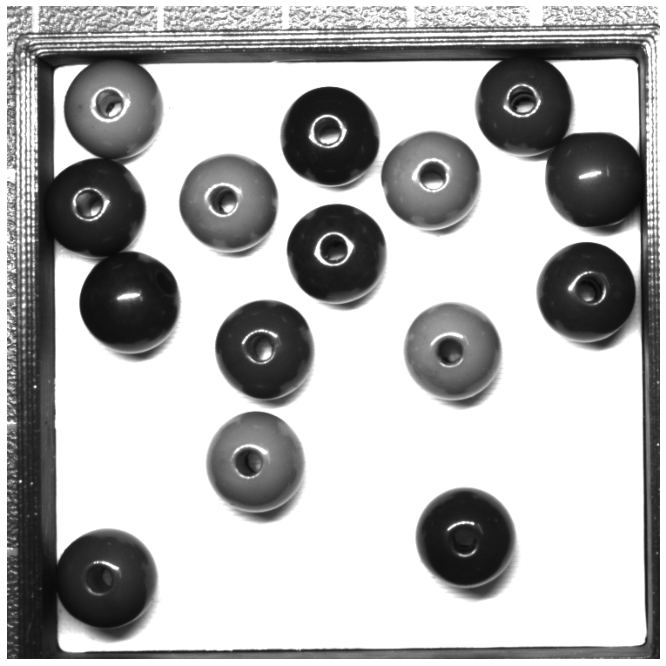

In [12]:
img = load_image('img/koralky_modra.png')
cropped = crop(img, 750, 750, 1500, 1500) # optional, může se hodit
# Případné další předzpracování
plot_images(cropped)

img_g = to_gray(cropped)

#### 2) Výběr prahů pro segmentaci

S využitím slideru najděte prahy pro segmentaci vámi zvolených korálků ve vámi zvoleném obrázku.

In [13]:
@interact(value=create_slider(min=0, max=255, description='Value'))
def _(value):
    mask = segmentation_two_thresholds(img_g, value[0], value[1]) ###
    plot_images(mask, img_g, titles=['Segmentation', 'Original'])

interactive(children=(IntRangeSlider(value=(0, 255), continuous_update=False, description='Value\xa0\xa0\xa0\x…

#### 3) Segmentace

Vysegmentujte zvolené korálky a spočtěte je.

In [14]:
def count_objects(mask, min_area, max_area):
    segmented, count, _ = find_contours(mask, min_area, max_area)
    return segmented, count

In total 5 blue objects found.


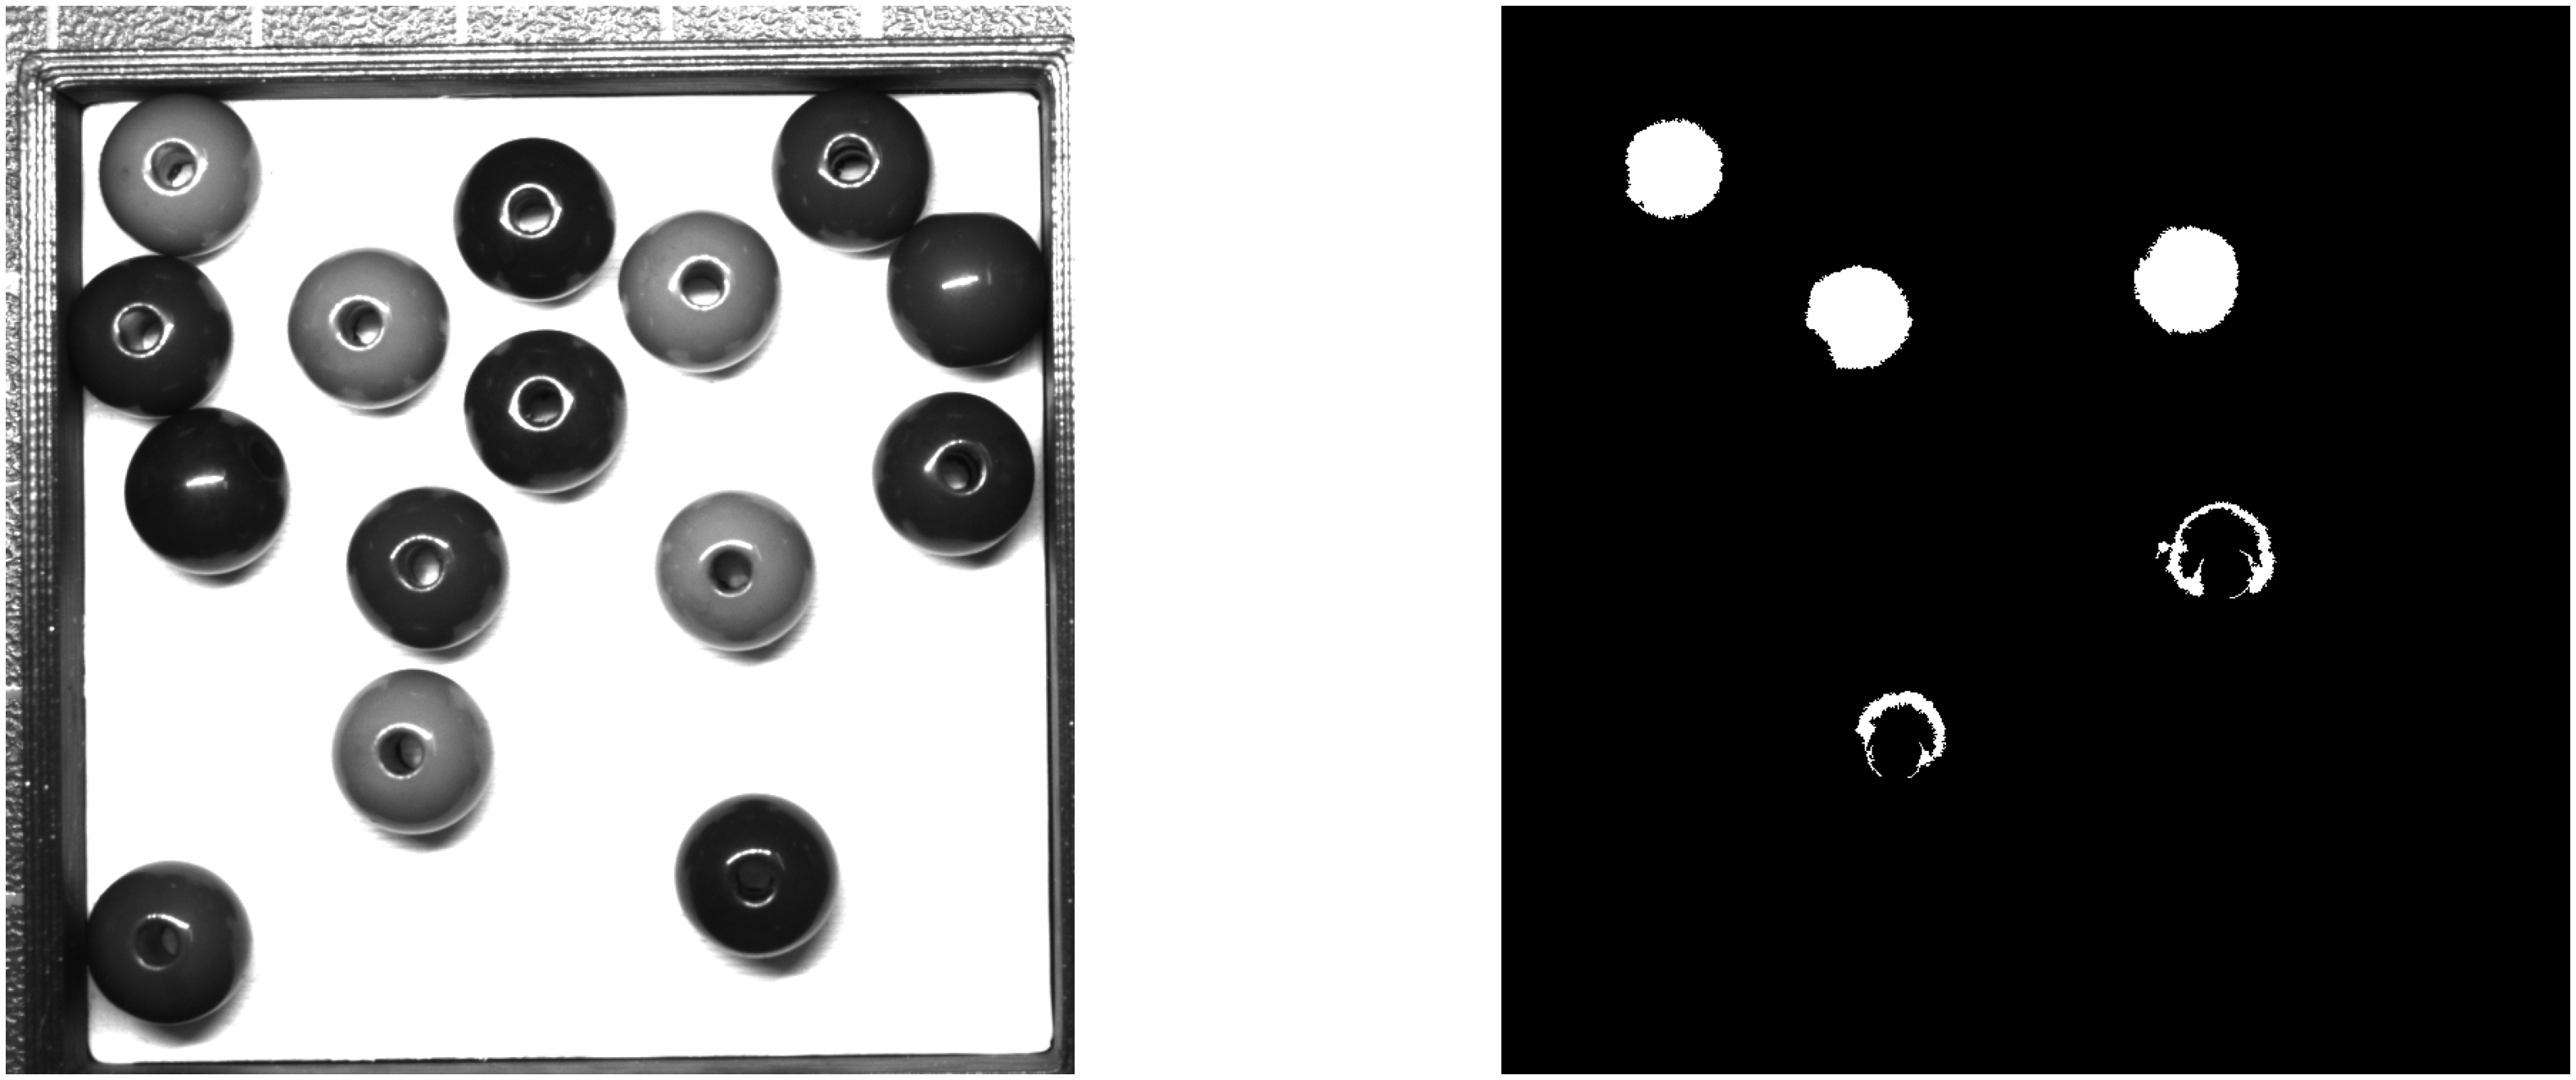

In [28]:
selected_color = 'blue'

mask = segmentation_two_thresholds(img_g, 122, 134) ###
segmented, count = count_objects(mask, 300, 199999)

print(f'In total {count} {selected_color} objects found.')
plot_images(cropped, segmented) # Poronvání původního obrázku s výsledkem segmentace

#### 4) Bonusová část - opakujte postup pro alespoň jednu další barvu

In [ ]:
...